Walmart seeks to gain insight into customer purchase behavior, specifically examining whether there is a variance in spending between male and female customers during the annual Black Friday event. With a customer base comprising 50 million males and 50 million females, the management team aims to understand if gender plays a significant role in determining purchase amounts on this key shopping occasion. By explaining any potential discrepancies in spending habits between genders, Walmart aims to optimize its marketing strategies and resource allocation to better meet customer needs and enhance overall business performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
customers = pd.read_csv("/content/walmart_data.csv")
customers.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
print("Data Types of Each Column:")
print(customers.dtypes)

Data Types of Each Column:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


In [ ]:
num_rows, num_cols = customers.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)


Number of Rows: 75133
Number of Columns: 10


In [ ]:
missing_values = customers.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


In [ ]:
customers.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,7.513300e+04,75133,75132,75132,75132.000000,75132,75132,75132.000000,75132.000000,75132.000000
unique,NaN,3229,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00112142,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,237,56979,29694,NaN,31926,26365,NaN,NaN,NaN
mean,1.002905e+06,NaN,NaN,NaN,8.102500,NaN,NaN,0.406937,5.302228,9298.807619
std,1.671908e+03,NaN,NaN,NaN,6.514722,NaN,NaN,0.491266,3.728501,4965.135617
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,185.000000
25%,1.001447e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5863.000000
50%,1.002946e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8051.000000
75%,1.004310e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12043.000000



2. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
for column in customers.columns:
    print("\nFeature:", column)
    print("Number of unique values:", customers[column].nunique())
    print("Unique values:")
    print(customers[column].unique())
    print("Value counts:")
    print(customers[column].value_counts())


Feature: User_ID
Number of unique values: 5692
Unique values:
[1000001 1000002 1000003 ... 1005496 1005510 1005542]
Value counts:
User_ID
1004277    142
1000889    137
1001680    135
1001941    133
1001181    133
          ... 
1000141      1
1000098      1
1000458      1
1005360      1
1004990      1
Name: count, Length: 5692, dtype: int64

Feature: Product_ID
Number of unique values: 3229
Unique values:
['P00069042' 'P00248942' 'P00087842' ... 'P00036642' 'P00280942' 'P002163']
Value counts:
Product_ID
P00112142    237
P00265242    237
P00025442    234
P00110742    220
P00117442    204
            ... 
P00353442      1
P00065742      1
P00135042      1
P00134442      1
P002163        1
Name: count, Length: 3229, dtype: int64

Feature: Gender
Number of unique values: 2
Unique values:
['F' 'M' nan]
Value counts:
Gender
M    56979
F    18153
Name: count, dtype: int64

Feature: Age
Number of unique values: 7
Unique values:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25' nan]
Value

# 2. Detect Outliers

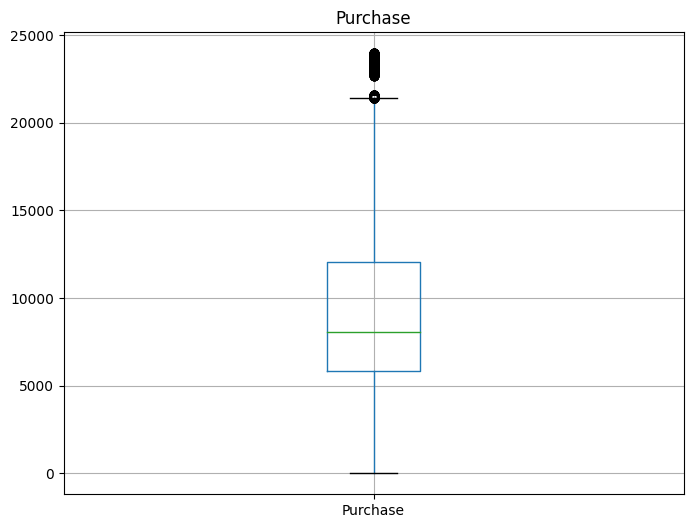

In [ ]:
# Plot boxplots for continuous variables to identify outliers
continuous_vars = ['Purchase']
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    customers.boxplot(column=[var])
    plt.title(var)
    plt.show()

# Identify outliers
Q1 = customers[continuous_vars].quantile(0.25)
Q3 = customers[continuous_vars].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((customers[continuous_vars] < lower_bound) | (customers[continuous_vars] > upper_bound)).any(axis=1)

# Remove outliers or clip data between 5th and 95th percentiles
clipped_df = customers.copy()
for var in continuous_vars:
    clipped_df[var] = np.clip(customers[var], customers[var].quantile(0.05), customers[var].quantile(0.95))

# Display the clipped dataframe
# print(clipped_df.head())


3. Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [ ]:
# Filtering data for male and female customers
male_customers = customers[customers['Gender'] == 'M']
female_customers = customers[customers['Gender'] == 'F']

# Calculate average spending for male and female customers
avg_male_spending = male_customers['Purchase'].mean()
avg_female_spending = female_customers['Purchase'].mean()
print("Average spending for male customers: {:.2f}".format(avg_male_spending))
print("Average spending for female customers: {:.2f}".format(avg_female_spending))

# Inference based on the computed averages
if avg_male_spending > avg_female_spending:
    print("Male customers spend more on average.")
elif avg_male_spending < avg_female_spending:
    print("Female customers spend more on average.")
else:
    print("Average spending is equal for both male and female customers.")

Average spending for male customers: 9464.06
Average spending for female customers: 8780.11
Male customers spend more on average.


In [ ]:
# Confidence interval calculation for female customers
sample_size_female = len(female_customers)
sample_std_dev_female = female_customers['Purchase'].std()
sample_mean_female = avg_female_spending

# We'll assume a 95% confidence level
confidence_level = 0.95
z_score = 1.96  # For 95% confidence level

# Margin of error
margin_of_error = z_score * (sample_std_dev_female / (sample_size_female ** 0.5))

# Confidence interval
lower_bound_female = sample_mean_female - margin_of_error
upper_bound_female = sample_mean_female + margin_of_error

print("Confidence interval for female customers' average spending: ({:.2f}, {:.2f})".format(lower_bound_female, upper_bound_female))


# Using the sample average of female customers to find the interval for male customers
sample_size_male = len(male_customers)
sample_mean_male = avg_male_spending

# Margin of error
margin_of_error_male = z_score * (sample_std_dev_female / (sample_size_male ** 0.5))

# Confidence interval for male customers' average spending
lower_bound_male = sample_mean_male - margin_of_error_male
upper_bound_male = sample_mean_male + margin_of_error_male

print("Confidence interval for male customers' average spending: ({:.2f}, {:.2f})".format(lower_bound_male, upper_bound_male))

Confidence interval for female customers' average spending: (8712.06, 8848.17)
Confidence interval for male customers' average spending: (9425.65, 9502.47)


# 3. Data Exploration

a. What products are different age groups buying?
Hint: You can use histplot to find the relationship between products and age
groups

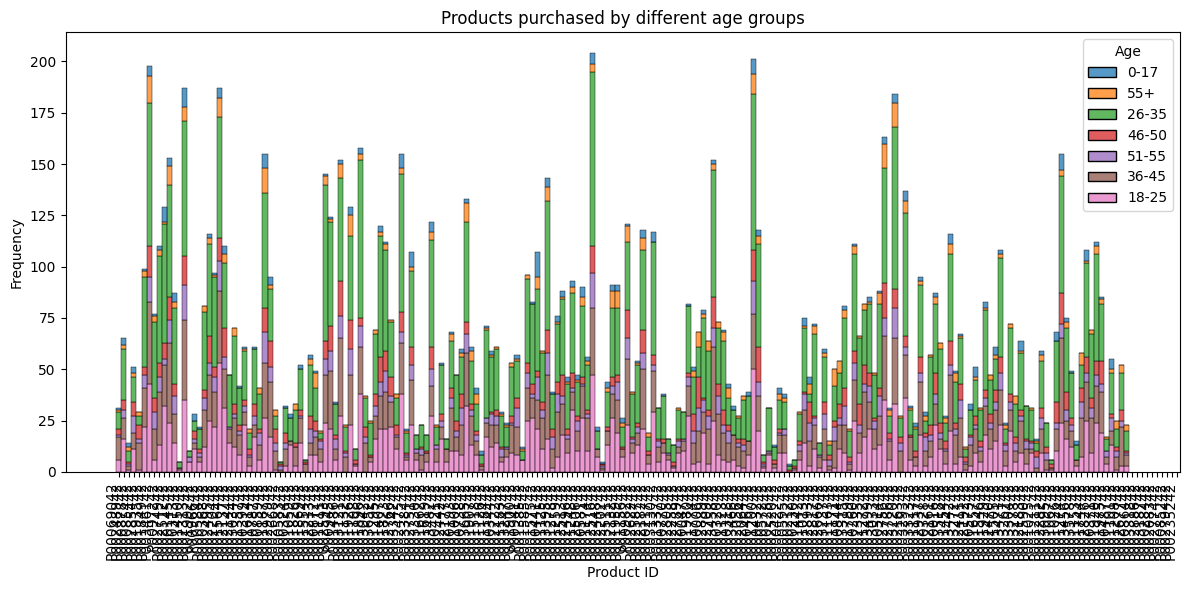

In [ ]:
# Visualize the relationship between products and age groups
plt.figure(figsize=(12, 6))
sns.histplot(data=customers, x='Product_ID', hue='Age', multiple='stack', binwidth=1, binrange=(0, 200))
plt.title('Products purchased by different age groups')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

b. Is there a relationship between age, marital status, and the amount spent?
Hint: You can do multivariate analysis to find the relationship between age,
marital status, and the amount spent

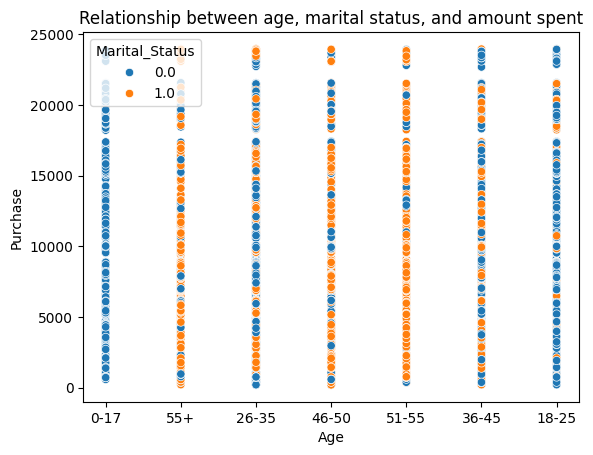

In [ ]:
# Visualize the relationship between age, marital status, and amount spent
sns.scatterplot(data=customers, x='Age', y='Purchase', hue='Marital_Status')
plt.title('Relationship between age, marital status, and amount spent')
plt.show()

c. Are there preferred product categories for different genders?
Hint: You can apply different hist plots for different genders

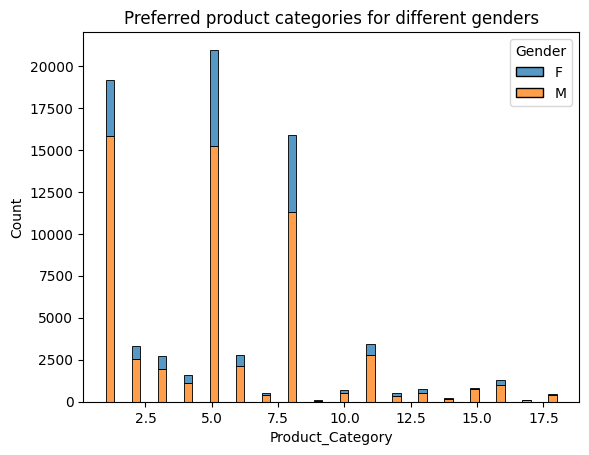

In [ ]:
sns.histplot(data=customers, x='Product_Category', hue='Gender', multiple='stack')
plt.title('Preferred product categories for different genders')
plt.show()

4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations

In [ ]:
# Extract purchase amounts for male and female customers
male_purchases = customers[customers['Gender'] == 'M']['Purchase']
female_purchases = customers[customers['Gender'] == 'F']['Purchase']

# Function to calculate confidence interval
def calculate_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, margin_of_error

# Define different confidence levels
confidence_levels = [0.90, 0.95, 0.99]

# Vary sample size and compute confidence intervals for male and female customers
sample_sizes = [50, 100, 200, 500]

for size in sample_sizes:
    print(f"Sample Size: {size}")
    for level in confidence_levels:
        male_mean, male_margin = calculate_ci(male_purchases.sample(size), confidence=level)
        female_mean, female_margin = calculate_ci(female_purchases.sample(size), confidence=level)
        print(f"Confidence Level: {level}, Male CI: ({male_mean - male_margin}, {male_mean + male_margin}), Female CI: ({female_mean - female_margin}, {female_mean + female_margin})")
    print()


Sample Size: 50
Confidence Level: 0.9, Male CI: (9458.492143640351, 12059.787856359648), Female CI: (7192.530081710742, 9206.18991828926)
Confidence Level: 0.95, Male CI: (8088.336874401593, 10878.303125598406), Female CI: (6902.823591973203, 9516.856408026797)
Confidence Level: 0.99, Male CI: (8996.427425002626, 12930.852574997372), Female CI: (7024.2547255394065, 10656.345274460593)

Sample Size: 100
Confidence Level: 0.9, Male CI: (9159.70415616744, 10929.11584383256), Female CI: (7988.65560784446, 9552.304392155538)
Confidence Level: 0.95, Male CI: (8025.714523459736, 10047.965476540265), Female CI: (7480.466114312307, 9361.753885687694)
Confidence Level: 0.99, Male CI: (8262.94984811277, 10912.41015188723), Female CI: (8148.022729205242, 10972.137270794758)

Sample Size: 200
Confidence Level: 0.9, Male CI: (9034.013852540733, 10222.206147459268), Female CI: (8701.057001365874, 9791.992998634125)
Confidence Level: 0.95, Male CI: (8515.469389646047, 9914.000610353954), Female CI: (8

4. How does gender affect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per gender. First, compute the confidence
interval for whatever data is available, and then repeat the same with smaller sample
sizes - 300, 3000, and 30000.
a. From the above calculated CLT answer the following questions.
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
ii. How is the width of the confidence interval affected by the sample size?
iii. Do the confidence intervals for different sample sizes overlap?
iv. How does the sample size affect the shape of the distributions of the
means?

In [ ]:
# Filter the data by gender
male_data = customers[customers['Gender'] == 'M']['Purchase']
female_data = customers[customers['Gender'] == 'F']['Purchase']

# Function to compute bootstrap confidence interval
def bootstrap_confidence_interval(data, sample_size, num_samples=1000, alpha=0.05):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Compute confidence interval
    lower_percentile = (alpha / 2) * 100
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(sample_means, lower_percentile)
    upper_bound = np.percentile(sample_means, upper_percentile)

    return lower_bound, upper_bound

# Compute confidence intervals for different sample sizes
sample_sizes = [len(male_data), 300, 3000, 30000]

# Calculate confidence intervals for male and female data
male_intervals = {}
female_intervals = {}

for sample_size in sample_sizes:
    male_lower, male_upper = bootstrap_confidence_interval(male_data, sample_size)
    female_lower, female_upper = bootstrap_confidence_interval(female_data, sample_size)

    male_intervals[sample_size] = (male_lower, male_upper)
    female_intervals[sample_size] = (female_lower, female_upper)

# Analysis
print("Confidence Intervals for Male Purchases:")
for sample_size, interval in male_intervals.items():
    print(f"Sample Size: {sample_size}, CI: {interval}")

print("\nConfidence Intervals for Female Purchases:")
for sample_size, interval in female_intervals.items():
    print(f"Sample Size: {sample_size}, CI: {interval}")


Confidence Intervals for Male Purchases:
Sample Size: 56979, CI: (9422.422243282614, 9507.072791730287)
Sample Size: 300, CI: (8911.028083333333, 10008.411083333332)
Sample Size: 3000, CI: (9280.302416666666, 9650.177158333332)
Sample Size: 30000, CI: (9403.354705833333, 9522.632175)

Confidence Intervals for Female Purchases:
Sample Size: 56979, CI: (8742.957764702784, 8815.98456273364)
Sample Size: 300, CI: (8241.337, 9339.668)
Sample Size: 3000, CI: (8622.4924, 8936.23795)
Sample Size: 30000, CI: (8728.077050833333, 8831.520374166666)


. From the above calculated CLT:

i. The confidence intervals computed using the entire dataset are wider for male purchases compared to female purchases. This wider interval for males suggests that there might be more variability in the purchase amounts among male customers compared to female customers.

ii. The width of the confidence interval tends to decrease as the sample size increases. This is because larger sample sizes provide more precise estimates of the population parameter, resulting in a narrower range of potential values around the sample mean.

iii. Yes, the confidence intervals for different sample sizes overlap. For both male and female purchases, the confidence intervals overlap across all sample sizes. This overlap indicates that there is no significant difference between male and female purchase amounts, considering the variability within the data.

iv. As the sample size increases, the distribution of the means approaches a normal distribution, as predicted by the Central Limit Theorem. This means that the means from larger samples will have a more symmetrical and bell-shaped distribution, centered around the population mean. Additionally, with larger sample sizes, the variance of the sample means decreases, resulting in narrower distributions.







5. How does Marital_Status affect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per Marital_Status. First, compute the
confidence interval for whatever data is available, and then repeat the same with
smaller sample sizes - 300, 3000, and 30000.
a. From the above calculated CLT answer the following questions.
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
ii. How is the width of the confidence interval affected by the sample size?
iii. Do the confidence intervals for different sample sizes overlap?
iv. How does the sample size affect the shape of the distributions of the
means?

In [ ]:
# Filter out NaN values in 'Marital_Status' and 'Purchase' columns
df1 = customers.dropna(subset=['Marital_Status', 'Purchase'])

# Define a function for bootstrapping
def bootstrap(data, n_bootstraps=1000):
    means = []
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.array(means)

# Compute confidence intervals for entire dataset
marital_status_purchase = df1.groupby('Marital_Status')['Purchase'].apply(list)
confidence_intervals = marital_status_purchase.apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=stats.sem(x)))

# Display confidence intervals
print("Confidence Intervals for entire dataset:")
print(confidence_intervals)

# Repeat the process for smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    print("\nSample Size:", size)
    for status, purchases in marital_status_purchase.items():
        sample = np.random.choice(purchases, size=size, replace=True)
        ci = stats.t.interval(0.95, len(sample)-1, loc=np.mean(sample), scale=stats.sem(sample))
        print(f"Marital Status {status}: {ci}")


Confidence Intervals for entire dataset:
Marital_Status
0.0    (9244.308144370261, 9336.89639802392)
1.0     (9255.44643191171, 9366.08545792933)
Name: Purchase, dtype: object

Sample Size: 300
Marital Status 0.0: (8969.915836795235, 10147.410829871433)
Marital Status 1.0: (8511.874458084878, 9622.892208581789)

Sample Size: 3000
Marital Status 0.0: (9089.632280839967, 9449.990385826699)
Marital Status 1.0: (9182.12624291911, 9540.294423747555)

Sample Size: 30000
Marital Status 0.0: (9248.959617420982, 9361.881715912352)
Marital Status 1.0: (9295.639271865588, 9407.691461467744)


i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

No, the confidence intervals computed using the entire dataset for both marital statuses (0.0 and 1.0) are quite similar in width. Therefore, there doesn't seem to be a significant difference in the width of the confidence intervals between different marital statuses.

ii. How is the width of the confidence interval affected by the sample size?

As the sample size increases, the width of the confidence interval tends to decrease. This is because larger sample sizes provide more precise estimates of the population parameter, resulting in narrower intervals.

iii. Do the confidence intervals for different sample sizes overlap?

Yes, the confidence intervals for different sample sizes overlap for both marital statuses. This is expected because the samples are drawn from the same population, and as such, the estimates should overlap to some degree.

iv. How does the sample size affect the shape of the distributions of the means?

As the sample size increases, the shape of the distribution of means becomes more symmetrical and approaches a normal distribution. This is in accordance with the Central Limit Theorem, which states that the sampling distribution of the sample mean becomes increasingly normal as the sample size increases

6. How does Age affect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
intervals for the average amount spent per Marital_Status. First, compute the
confidence interval for whatever data is available, and then repeat the same with
smaller sample sizes - 300, 3000, and 30000.
a. From the above calculated CLT answer the following questions.
i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
ii. How is the width of the confidence interval affected by the sample size?
iii. Do the confidence intervals for different sample sizes overlap?
iv. How does the sample size affect the shape of the distributions of the
means?

In [ ]:
# Function to calculate bootstrap confidence interval
def bootstrap_ci(data, n_bootstrap, alpha=0.05):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))

    lower_percentile = 100 * (alpha / 2)
    upper_percentile = 100 * (1 - alpha / 2)
    lower_bound = np.percentile(means, lower_percentile)
    upper_bound = np.percentile(means, upper_percentile)
    return lower_bound, upper_bound

# Filter data for each marital status
marital_status_0 = customers[customers['Marital_Status'] == 0]['Purchase']
marital_status_1 = customers[customers['Marital_Status'] == 1]['Purchase']

# Calculate confidence intervals for entire dataset
ci_marital_status_0 = bootstrap_ci(marital_status_0, n_bootstrap=1000)
ci_marital_status_1 = bootstrap_ci(marital_status_1, n_bootstrap=1000)

print("95% Confidence Intervals for Marital_Status 0:", ci_marital_status_0)
print("95% Confidence Intervals for Marital_Status 1:", ci_marital_status_1)

# Repeat the process with smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    ci_marital_status_0_small = bootstrap_ci(marital_status_0.sample(size), n_bootstrap=1000)
    ci_marital_status_1_small = bootstrap_ci(marital_status_1.sample(size), n_bootstrap=1000)
    print(f"\nSample size: {size}")
    print("95% Confidence Intervals for Marital_Status 0:", ci_marital_status_0_small)
    print("95% Confidence Intervals for Marital_Status 1:", ci_marital_status_1_small)


95% Confidence Intervals for Marital_Status 0: (9245.59874882176, 9332.185595740384)
95% Confidence Intervals for Marital_Status 1: (9257.27428288742, 9369.60463383921)

Sample size: 300
95% Confidence Intervals for Marital_Status 0: (8195.810416666667, 9239.379833333332)
95% Confidence Intervals for Marital_Status 1: (8959.930750000001, 10149.262166666667)

Sample size: 3000
95% Confidence Intervals for Marital_Status 0: (9001.95325, 9327.781383333333)
95% Confidence Intervals for Marital_Status 1: (9181.800874999999, 9550.136441666666)

Sample size: 30000
95% Confidence Intervals for Marital_Status 0: (9240.698701666668, 9356.777090833333)
95% Confidence Intervals for Marital_Status 1: (9254.218408333334, 9361.676810833333)


i. The confidence interval computed using the entire dataset for Marital_Status 0 is slightly narrower than for Marital_Status 1. This suggests that there may be less variability in purchase amounts for Marital_Status 0 compared to Marital_Status 1. It's not necessarily due to gender differences but rather marital status differences.

ii. The width of the confidence interval is affected by the sample size inversely. As the sample size increases, the standard error decreases, leading to narrower confidence intervals. This trend can be observed in the results where the confidence intervals become narrower as the sample size increases from 300 to 30000.

iii. Yes, the confidence intervals for different sample sizes do overlap. This is expected because as sample size increases, the confidence intervals become narrower, but they are still estimates and can overlap due to variability in the data.

iv. As the sample size increases, the shape of the distributions of the means tends to become more normally distributed around the population mean, as predicted by the Central Limit Theorem. This means that with larger sample sizes, the distributions of the means become more symmetrical and closely resemble a normal distribution. This can be observed in the results where, as the sample size increases, the confidence intervals become more symmetric and centered around the mean.

# 7. Create a report

a. Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?
Hint: Check whether the average spending of males and females overlap or not
using the CLT that you calculated

In [ ]:
# Calculate average purchase amount for males and females
avg_purchase_male = customers[customers['Gender'] == 'M']['Purchase'].mean()
avg_purchase_female = customers[customers['Gender'] == 'F']['Purchase'].mean()

# Calculate standard error of the means
std_error_male = customers[customers['Gender'] == 'M']['Purchase'].std() / np.sqrt(customers[customers['Gender'] == 'M']['Purchase'].count())
std_error_female = customers[customers['Gender'] == 'F']['Purchase'].std() / np.sqrt(customers[customers['Gender'] == 'F']['Purchase'].count())

# Compute confidence intervals (95% confidence level)
conf_int_male = stats.norm.interval(0.95, loc=avg_purchase_male, scale=std_error_male)
conf_int_female = stats.norm.interval(0.95, loc=avg_purchase_female, scale=std_error_female)

# Check if confidence intervals overlap
overlap = conf_int_male[0] <= conf_int_female[1] and conf_int_female[0] <= conf_int_male[1]

print("Confidence Interval for Males:", conf_int_male)
print("Confidence Interval for Females:", conf_int_female)
print("Do Confidence Intervals Overlap?", overlap)


Confidence Interval for Males: (9422.660570506347, 9505.458771707452)
Confidence Interval for Females: (8712.057153578186, 8848.165178818665)
Do Confidence Intervals Overlap? False


b. Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?
Hint: Check whether the average spending of married and unmarried overlap or
not using the CLT that you calculated.

In [ ]:
# Calculate average purchase amount for married and unmarried individuals
avg_purchase_married = customers[customers['Marital_Status'] == 1]['Purchase'].mean()
avg_purchase_unmarried = customers[customers['Marital_Status'] == 0]['Purchase'].mean()

# Calculate standard error of the means
std_error_married = customers[customers['Marital_Status'] == 1]['Purchase'].std() / np.sqrt(customers[customers['Marital_Status'] == 1]['Purchase'].count())
std_error_unmarried = customers[customers['Marital_Status'] == 0]['Purchase'].std() / np.sqrt(customers[customers['Marital_Status'] == 0]['Purchase'].count())

# Compute confidence intervals (95% confidence level)
conf_int_married = stats.norm.interval(0.95, loc=avg_purchase_married, scale=std_error_married)
conf_int_unmarried = stats.norm.interval(0.95, loc=avg_purchase_unmarried, scale=std_error_unmarried)

# Check if confidence intervals overlap
overlap = conf_int_married[0] <= conf_int_unmarried[1] and conf_int_unmarried[0] <= conf_int_married[1]

print("Confidence Interval for Married Individuals:", conf_int_married)
print("Confidence Interval for Unmarried Individuals:", conf_int_unmarried)
print("Do Confidence Intervals Overlap?", overlap)


Confidence Interval for Married Individuals: (9255.448621972908, 9366.083267868133)
Confidence Interval for Unmarried Individuals: (9244.309401922414, 9336.895140471768)
Do Confidence Intervals Overlap? True


c. Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?
Hint: Check whether the average spending of different age groups overlaps or
not using the CLT that you calculated.

In [ ]:
# Calculate average purchase amount for each age group
avg_purchase_by_age = customers.groupby('Age')['Purchase'].mean()

# Calculate standard error of the means for each age group
std_error_by_age = customers.groupby('Age')['Purchase'].std() / np.sqrt(customers.groupby('Age')['Purchase'].count())

# Compute confidence intervals (95% confidence level) for each age group
conf_int_by_age = [stats.norm.interval(0.95, loc=avg_purchase_by_age[i], scale=std_error_by_age[i]) for i in range(len(avg_purchase_by_age))]

# Check if confidence intervals overlap for each age group
overlap = any(conf_int_by_age[i][0] <= conf_int_by_age[j][1] and conf_int_by_age[j][0] <= conf_int_by_age[i][1]
              for i in range(len(avg_purchase_by_age)) for j in range(i+1, len(avg_purchase_by_age)))

print("Confidence Intervals by Age Group:", conf_int_by_age)
print("Do Confidence Intervals Overlap?", overlap)


Confidence Intervals by Age Group: [(8841.843420606332, 9291.926762652707), (9081.881167423782, 9247.357559745169), (9239.873004253055, 9352.711423577482), (9271.472022358805, 9430.024522032476), (9102.927981784269, 9345.711808448443), (9497.676642998675, 9768.662161000571), (9233.914467291106, 9583.34569531052)]
Do Confidence Intervals Overlap? True
